# Assignment 4

Done by:
- Saumili Jana: 20ME10075
- Ushasi Das: 20EC10086
- Jaya Kishnani: 20EC30020
- Karthikeyan.R: 20EC30024

# Problem 1: Annual Rainfall Prediction 

In [72]:
#importing modules
import numpy as np
import scipy.io
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn import ensemble


In [73]:
#loading the dataset
mat = scipy.io.loadmat('annualrainfall.mat') 
print(mat)
print(list(mat.keys()))

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Feb  9 15:53:04 2022', '__version__': '1.0', '__globals__': [], 'XR': array([[ 0.71902246,  2.57219519,  5.11558186, ...,  2.41893874,
         3.60258844,  0.27493529],
       [ 0.7999718 ,  2.35857331,  4.45938902, ...,  2.40409836,
         2.85737705,  0.1335041 ],
       [ 1.11637882,  3.81757097,  5.71581225, ...,  4.59327869,
         5.95469945,  3.75437158],
       ...,
       [12.51203751, 10.7371372 ,  9.21448246, ..., 13.48319672,
        13.54938525,  7.48657787],
       [10.39985187,  9.18790383,  8.05478519, ..., 11.76885246,
        11.99065574,  6.31639344],
       [11.28778427,  9.79191897,  8.5237335 , ...,  7.06131148,
         7.19459016,  3.78983607]])}
['__header__', '__version__', '__globals__', 'XR']


Since after loading the data we observe that it is in the form of a dictionary, so we need to extract our required matrix XR.

In [74]:
#Extracting the required matrix 'XR'
x = mat.get('XR')              #extracting matrix XR
data = np.array(x)             #converting to np array
print(data)
(r,c) = np.shape(data)         #357x118 ,matrix

[[ 0.71902246  2.57219519  5.11558186 ...  2.41893874  3.60258844
   0.27493529]
 [ 0.7999718   2.35857331  4.45938902 ...  2.40409836  2.85737705
   0.1335041 ]
 [ 1.11637882  3.81757097  5.71581225 ...  4.59327869  5.95469945
   3.75437158]
 ...
 [12.51203751 10.7371372   9.21448246 ... 13.48319672 13.54938525
   7.48657787]
 [10.39985187  9.18790383  8.05478519 ... 11.76885246 11.99065574
   6.31639344]
 [11.28778427  9.79191897  8.5237335  ...  7.06131148  7.19459016
   3.78983607]]


### Part 1

Rows correspond to locations and columns correspond to years. For ease of operation we want the rows to be represent the years and columns represent rows, for the first part of the problem.


In [75]:
#transpose
data_t = np.transpose(data)               #row->years; columns->locations
data_t
(r,c)= np.shape(data_t) 

In [76]:
#calculating mean and std deviation of the total rainfall
total = np.zeros(r)         
i = 0
for row in data_t:
    total[i] = np.sum(data_t[i])         #total rainfall in year
    i = i+1
#print(total)
s = np.std(total)                        #mean of total rainfalls
m = np.mean(total)                       #standard deviation of total rainfalls
print('mean =',m,'\nstandard deviation = ', s)
np.shape(total)

mean = 2731.5638988707724 
standard deviation =  266.89890593445193


(118,)

Now we proceed to assign the labels to each year as per the given , i.e. if the total rainfall in any year is more than m+s, the label should be +1, if the total rainfall in any year is below m-s, the label should be -1, else the label should be 0. 

In [77]:
#Generating the labels
y = np.zeros(r)       #array for storing the labels
i = 0
while(i<r):
    if(total[i]>m+s):
        y[i] = 1
    elif(total[i]<m-s):
        y[i] = -1
    i += 1
print(y)    

[-1.  0.  0. -1. -1.  0.  0.  0.  0.  0. -1.  0. -1.  0. -1.  1.  1. -1.
  0.  0.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.
  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  1.  0. -1. -1.  0.  0.
  0.  0.  0.  1.  1.  0.  1.  0.  0.  1. -1.  0.  0. -1.  0.  1.  0. -1.
  0.  0.  1.  0.  0.  0. -1.  0.  0. -1.  1.  0.  0. -1. -1.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0. -1.  0.  0.  0. -1.  0.  0.
 -1.  0.  0.  0.  0. -1. -1.  0.  0. -1.]


Now that we have both the features as well as labels, we split the data into training and testing data. As instructed, we use the first 100 years for training using 5-fold cross validation, and the remaining 18 years for testing.

In [78]:
#splitting the data into testing and training data
x_train = data_t[0:100]
x_test = data_t[100:]
y_train = y[0:100]
y_test = y[100:]
#np.shape(y_train)

#### Using decision tree

In [79]:
#Decision tree-1
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=10) #decision tree with depth 10
decision_tree = decision_tree.fit(x_train, y_train)     #training
cross_val_score(decision_tree, x_train, y_train, cv=5) #5 fold cross validation


r = export_text(decision_tree)  
print(r)

|--- feature_17 <= 2.41
|   |--- feature_263 <= 10.11
|   |   |--- class: -1.0
|   |--- feature_263 >  10.11
|   |   |--- feature_236 <= 8.83
|   |   |   |--- class: 0.0
|   |   |--- feature_236 >  8.83
|   |   |   |--- class: 1.0
|--- feature_17 >  2.41
|   |--- feature_122 <= 7.38
|   |   |--- feature_235 <= 5.60
|   |   |   |--- feature_287 <= 6.28
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_287 >  6.28
|   |   |   |   |--- class: -1.0
|   |   |--- feature_235 >  5.60
|   |   |   |--- feature_262 <= 12.52
|   |   |   |   |--- feature_296 <= 11.11
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_296 >  11.11
|   |   |   |   |   |--- feature_84 <= 20.62
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_84 >  20.62
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |--- feature_262 >  12.52
|   |   |   |   |--- feature_328 <= 9.10
|   |   |   |   |   |--- feature_97 <= 9.24
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   

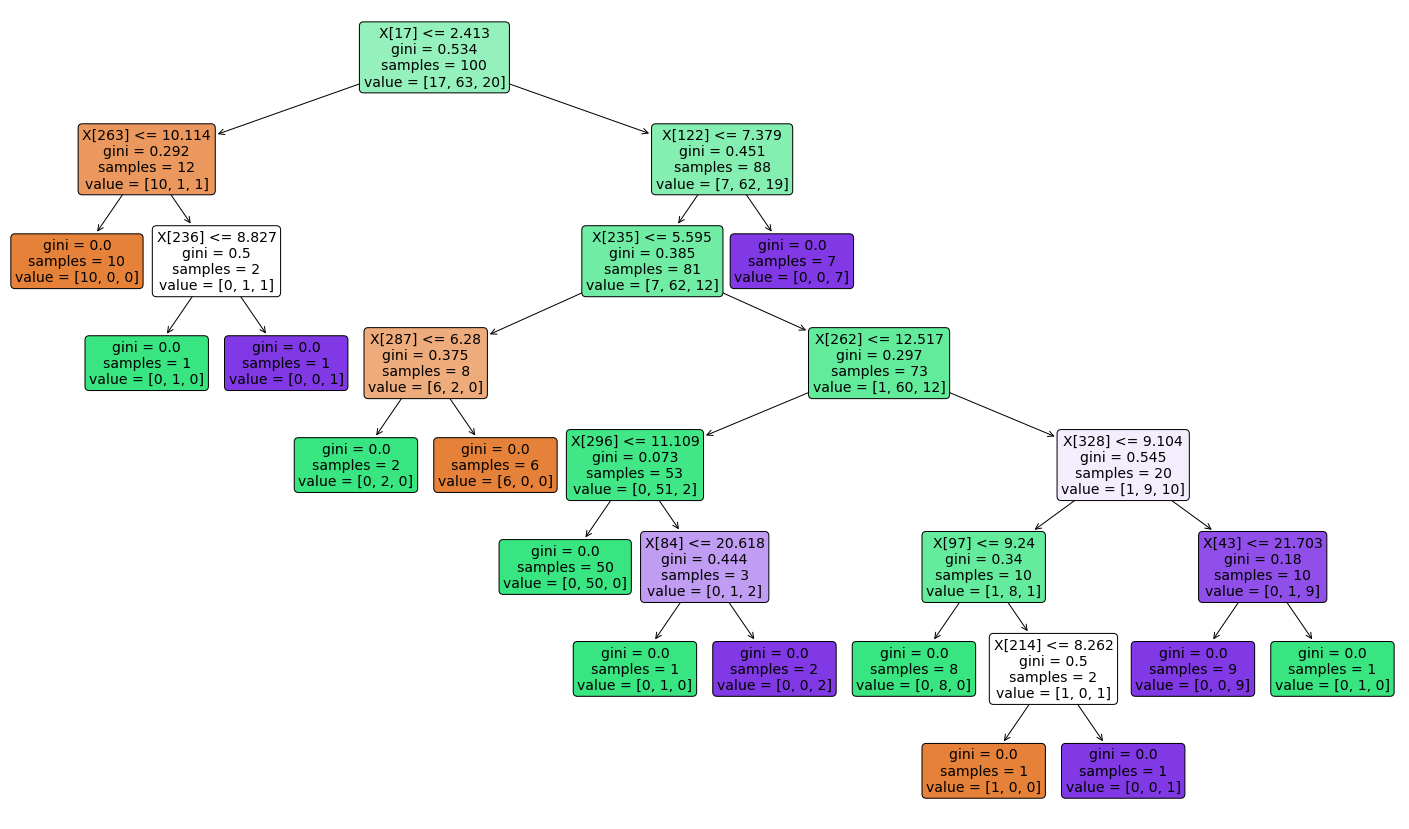

In [80]:
#plotting the decision tree
plt.figure(figsize=(25,15))
a = tree.plot_tree(decision_tree, fontsize=14, rounded = True,filled = True,)
plt.show(a)

In [81]:
y_pred = decision_tree.predict(x_test)
print('The predicted labels are', y_pred)

The predicted labels are [ 0.  0.  0.  0.  0.  1. -1.  0.  0.  1.  1.  0.  1. -1.  0.  0.  0.  0.]


In [82]:
#prediction accuracy
acc = decision_tree.score(x_test[:2],y_test[:2])
print('accuracy of predicton using decision tree is : ', acc*100,'%')

accuracy of predicton using decision tree is :  50.0 %


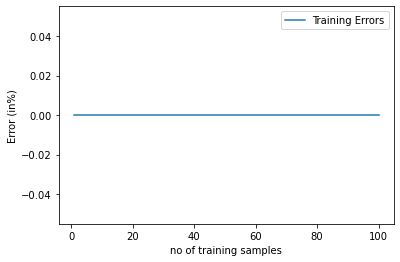

In [83]:
#Plotting the training data error
samples = np.arange(1, len(x_train)+1)
error_train = np.zeros(len(x_train))
i = 1
for x in x_train:
    error_train[i-1] = 1-decision_tree.score(x_train[:i],y_train[:i])
    i = i+1
    
# Generate plot
plt.plot(samples, error_train*100, label = 'Training Errors')
plt.legend()
plt.xlabel('no of training samples')
plt.ylabel('Error (in%)')
plt.show()

#### Using Random Forest
Now we repeat the same analysis using a random forest classifier

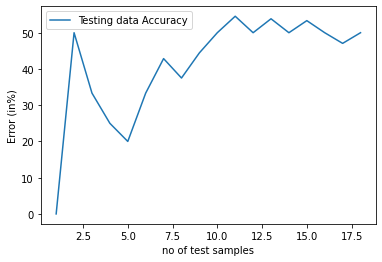

In [84]:
#Plotting the test data error
samples = np.arange(1, len(x_test)+1)
error_test = np.zeros(len(x_test))
i = 1
for x in x_test:
    error_test[i-1] = 1-decision_tree.score(x_test[:i],y_test[:i])
    i = i+1
    
# Generate plot
plt.plot(samples, error_test*100, label = 'Testing data Accuracy')
plt.legend()
plt.xlabel('no of test samples')
plt.ylabel('Error (in%)')
plt.show()

In [85]:
#Using random forest
forest = ensemble.RandomForestClassifier(n_estimators=10,max_depth=10)
forest = forest.fit(x_train, y_train)
cross_val_score(decision_tree, x_train, y_train, cv=5) #5 fold cross validation

y_pred = forest.predict(x_test)
print('The predicted labels are', y_pred)


The predicted labels are [ 0. -1.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [86]:
#prediction accuracy
acc = forest.score(x_test,y_test)
print('accuracy of predicton using decision tree is : ', acc*100,'%')

accuracy of predicton using decision tree is :  66.66666666666666 %


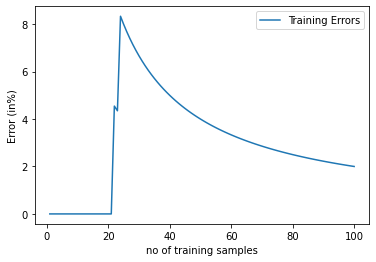

In [87]:
#Plotting the training data error
#a) with respect to no of test samples
samples = np.arange(1, len(x_train)+1)
error_train = np.zeros(len(x_train))
i = 1
for x in x_train:
    error_train[i-1] = 1-forest.score(x_train[:i],y_train[:i])
    i = i+1
    
# Generate plot
plt.plot(samples, error_train*100, label = 'Training Errors')
plt.legend()
plt.xlabel('no of training samples')
plt.ylabel('Error (in%)')
plt.show()

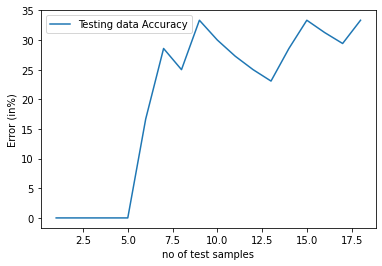

In [88]:
#Plotting the test data error
#a) with respect to no of test samples
samples = np.arange(1, len(x_test)+1)
error_test = np.zeros(len(x_test))
i = 1
for x in x_test:
    error_test[i-1] = 1-forest.score(x_test[:i],y_test[:i])
    i = i+1
    
# Generate plot
plt.plot(samples, error_test*100, label = 'Testing data Accuracy')
plt.legend()
plt.xlabel('no of test samples')
plt.ylabel('Error (in%)')
plt.show()

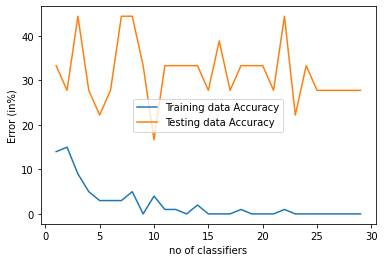

In [89]:
#Plotting test and training error
#b) with respect to no of classifiers used
estimators = np.arange(1, 30)
train_error = np.empty(len(estimators))
test_error = np.empty(len(estimators))
i = 0
for e in estimators:
    forest_clf = ensemble.RandomForestClassifier(n_estimators=e,max_depth=10)
    forest_clf = forest_clf.fit(x_train,y_train)
    train_error[i] =  1-forest_clf.score(x_train, y_train)
    test_error[i] = 1-forest_clf.score(x_test, y_test)
    i +=1
# Generate plot
plt.plot(estimators, train_error*100, label = 'Training data Accuracy')
plt.plot(estimators, test_error*100, label = 'Testing data Accuracy')
plt.legend()
plt.xlabel('no of classifiers')
plt.ylabel('Error (in%)')
plt.show()


Clearly we can conclude that using a Random Forest ensemble classifier significantly increases the accuracy of prediction

### Part 2
For this part we will be again using the original metrix and not the transpose. So the each row corresponds to a location and each olumn corresponds to a year.

Now, for each location, we need to define the mean and standard deviation of annual rainfall and attach a label +1/0/-1 to each location, for each year, according to the previous rule.

In [90]:
(r,c)= np.shape(data) 
(r,c)

(357, 118)

In [91]:
#calculating mean and std deviation and generating the labels
y = np.zeros([r,c])      #matrix of labels
i = 0
for row in data:
    s = np.std(row)       #standarad deviation of annual rainfalls at a location
    m = np.mean(row)      #mean of annual rainfalls at a location
    j = 0
    for col in row:
        if col>(m+s):
            y[i,j] = 1
        elif col<(m-s):
            y[i,j] = -1
        j = j + 1
    i = i+1
    
print ('The assigned labels corresponding to the loactions for each year are:\n', y)
#np.shape(y)

The assigned labels corresponding to the loactions for each year are:
 [[-1.  0.  1. ...  0.  0. -1.]
 [ 0.  0.  0. ...  0.  0. -1.]
 [-1.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0. -1. ...  0.  0. -1.]
 [ 0.  0. -1. ...  0.  0. -1.]
 [ 0.  0. -1. ... -1. -1. -1.]]


As instructed we use the first 100 years for training with 5-fold cross-validation, and the remaining years for testing.

In [92]:
#Splitting into test and train data
y_train = y[:, :100]
x_train = data[:, :100]
y_test = y[:,100:]
x_test = data[:,100:]

In [93]:
#To filter out un-necessary warnings
import warnings
warnings.filterwarnings( "ignore" )

In [94]:
#Decision tree
trees = []         #array of decision tree classifiers, one classifier for each location

i = 0
while (i<r):
    copy_x = y_train
    np.delete(copy_x, i, axis = 0)   # remove the location we are considering 
    b = DecisionTreeClassifier(random_state=0, max_depth=10)# predicting the label atthat location, using using the labels at the remaining locations in the same year
    labels = y_train[i]
    #print(labels)
    copy_x= np.transpose(copy_x)
    b = b.fit(copy_x, labels)
    score = cross_val_score(b, copy_x, labels, cv=5 )   #5 fold cross validation
    trees.append(b)
    i = i+1


In [95]:
#decision tree outputs and scores
accuracy = [] #array of accuracy at every location
y_predicted = [] #predicted lables
i = 0
for row in trees:
    copy_test = y_test
    np.delete(copy_test, i, axis = 0) # remove the location we are considering 
    copy_test = np.transpose(copy_test)
    y_pred = row.predict(copy_test)
    y_predicted.append(y_test) # predicting the labels at that location, using using the labels at the remaining locations in the same year
    y = y_test[i]
    scores = row.score(copy_test,y)
    accuracy.append(scores)
    i = i+1

print('Accuracy for each loaction(one element refers to the accuracy of the corresponding location)\n', accuracy)
print('predicted labels:\n', y_predicted)

Accuracy for each loaction(one element refers to the accuracy of the corresponding location)
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6111111111111112, 0.7777777777777778, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7777777777777778, 1.0, 1.0, 1.0, 1.0, 1.0, 

In [96]:
# Using Random forest

forests = []  #array of random forest classifiers, one classifier for each location
i = 0
while (i<r):
    copy_x = y_train
    np.delete(copy_x, i, axis = 0)
    b = ensemble.RandomForestClassifier(n_estimators=8,max_depth=10)
    labels = y_train[i]
    #print(labels)
    copy_x= np.transpose(copy_x)
    b = b.fit(copy_x, labels)
    score = cross_val_score(b, copy_x, labels, cv=5 )   #5 old cross validation
    forests.append(b)
    i = i+1
#forests

In [97]:
#random forest outputs and scores
accuracy = [] #array of accuracy at every location
y_predicted = [] #predicted lables
importance_rf = [] # array of top 10 predictor regions for each location
i = 0
for row in forests:
    copy_test = y_test
    np.delete(copy_test, i, axis = 0)
    copy_test = np.transpose(copy_test)
    y_pred = row.predict(copy_test)
    y_predicted.append(y_test)
    y = y_test[i]
    scores = row.score(copy_test,y)
    accuracy.append(scores)
    imp = b.feature_importances_
    copy_imp = imp
    copy_imp.sort()
    
    count = 0
    pred_regions = []
    while(count<10):
        (index,) = np.where(imp == copy_imp[c-count])
        #print(index)
        #print(count)
        pred_regions.append(index) #pred_region gives the top 10 predictor regions for each location after 10 iterations 
        count = count+1
    importance_rf.append(pred_regions) #stack up the top 10 predictor regions for each location
    i = i+1
print('Accuracy for each loaction(one element refers to the accuracy of the corresponding location)\n', accuracy)
print('predicted labels:\n', y_predicted)
print(y_predicted)
print(accuracy)


Accuracy for each loaction(one element refers to the accuracy of the corresponding location)
 [0.6666666666666666, 0.8888888888888888, 0.7222222222222222, 0.6666666666666666, 0.7222222222222222, 1.0, 0.6666666666666666, 0.7777777777777778, 0.8333333333333334, 0.6111111111111112, 0.4444444444444444, 0.5, 0.7222222222222222, 0.6666666666666666, 0.9444444444444444, 0.8888888888888888, 0.6111111111111112, 0.8333333333333334, 0.6666666666666666, 0.7777777777777778, 0.8888888888888888, 0.8333333333333334, 0.6111111111111112, 0.7777777777777778, 0.7777777777777778, 0.5555555555555556, 0.5555555555555556, 0.7222222222222222, 0.7222222222222222, 0.8888888888888888, 0.7222222222222222, 0.8333333333333334, 0.7222222222222222, 0.7777777777777778, 0.5555555555555556, 0.8888888888888888, 0.9444444444444444, 0.4444444444444444, 0.5, 0.8333333333333334, 0.6111111111111112, 0.6666666666666666, 0.3333333333333333, 0.6111111111111112, 0.7777777777777778, 0.7222222222222222, 0.8888888888888888, 0.66666666

[array([[ 0., -1.,  1., ...,  0.,  0., -1.],
       [ 0., -1.,  1., ...,  0.,  0., -1.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0., -1.],
       [-1.,  0.,  0., ...,  0.,  0., -1.],
       [ 0.,  0.,  0., ..., -1., -1., -1.]]), array([[ 0., -1.,  1., ...,  0.,  0., -1.],
       [ 0., -1.,  1., ...,  0.,  0., -1.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0., -1.],
       [-1.,  0.,  0., ...,  0.,  0., -1.],
       [ 0.,  0.,  0., ..., -1., -1., -1.]]), array([[ 0., -1.,  1., ...,  0.,  0., -1.],
       [ 0., -1.,  1., ...,  0.,  0., -1.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0., -1.],
       [-1.,  0.,  0., ...,  0.,  0., -1.],
       [ 0.,  0.,  0., ..., -1., -1., -1.]]), array([[ 0., -1.,  1., ...,  0.,  0., -1.],
       [ 0., -1.,  1., ...,  0.,  0., -1.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0.

## PROBLEM 2: HANDWRITTEN DIGIT PREDICTION

In [98]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import scipy.io
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn import metrics

Loading MNIST Dataset

In [99]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

In [100]:
#shape of dataset
print('X' + str(X.shape))
print('Y' + str(y.shape))

X(70000, 28, 28)
Y(70000,)


Splitting the dataset (75% images for training and rest for testing)

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [102]:
#shape of dataset
print('X_train' + str(X_train.shape))
print('X_test' + str(X_test.shape))
print('y_train' + str(y_train.shape))
print('y_test' + str(y_test.shape))

X_train(52500, 28, 28)
X_test(17500, 28, 28)
y_train(52500,)
y_test(17500,)


Applying Decision Tree and Random Forest Algorithms

In [103]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

Reshaping the datasets


In [104]:
# X_train is a 3D array. We have to reshape it to 2D to fit it in decision tree.
print(X_train.shape)
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape(nsamples, nx*ny)

nsamples, nx, ny = X_test.shape
X_test = X_test.reshape(nsamples, nx*ny)

(52500, 28, 28)


##### Decision Tree Classifier

In [105]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=20)
tree_clf = tree_clf.fit(X_train,y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.51%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1            2            3            4  \
precision     0.996339     0.994910     0.996174     0.998292     0.991082   
recall        0.999807     0.999148     0.997319     0.991516     0.994746   
f1-score      0.998070     0.997025     0.996746     0.994892     0.992911   
support    5172.000000  5869.000000  5221.000000  5304.000000  5139.000000   

                     5            6            7            8            9  \
precision     0.996839     0.996500     0.994202     0.999215     0.987457   
recall        0.995789     0.997276     0.995464     0.989695     0.989526   
f1-score      0.996314     0.996888     0.994833     0.994432     0.988490   
support    4750.000000  5139.000000  5512.000000  5143.000000  5251.000000   

           accuracy     macro avg  weighted avg  
precision  0.995067      0.995101      0.995075  
recall    

Predicting the labels of images in MNIST Dataset using Decision Tree Classifier

In [106]:
#Predict the response for test dataset
y_pred = tree_clf.predict(X_test)
print(y_pred)

print("Accuracy of Decision Tree Classifier:",metrics.accuracy_score(y_test, y_pred))

[1 7 5 ... 2 9 8]
Accuracy of Decision Tree Classifier: 0.8721714285714286


#### Random Forest Classifier

In [107]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators = 100, max_depth = 3)

# Fit on training data
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

In [108]:
y_pred_test = model.predict(X_test)
print(y_pred_test)

# View accuracy score
print("Accuracy of Random Forest Classifier: ",accuracy_score(y_test, y_pred_test))

[1 7 9 ... 2 9 0]
Accuracy of Random Forest Classifier:  0.7459428571428571
